<a href="https://colab.research.google.com/github/vishva2410/TELCO_CHURN_ML/blob/main/Teclo_churn_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder, MinMaxScaler

In [8]:
df = pd.read_csv('Telco.csv')

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
df.drop('customerID',axis=1,inplace=True)

In [36]:
oh = OneHotEncoder()
oh.fit_transform(df)
mx = MinMaxScaler()
mx.fit_transform(df)

array([[0.        , 0.        , 1.        , ..., 0.11542289, 0.38361409,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.38507463, 0.2245023 ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.35422886, 0.02404288,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11293532, 0.45849923,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.55870647, 0.40735069,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.86965174, 0.8280245 ,
        0.        ]])

<Axes: title={'center': 'Correlation Matrix'}>

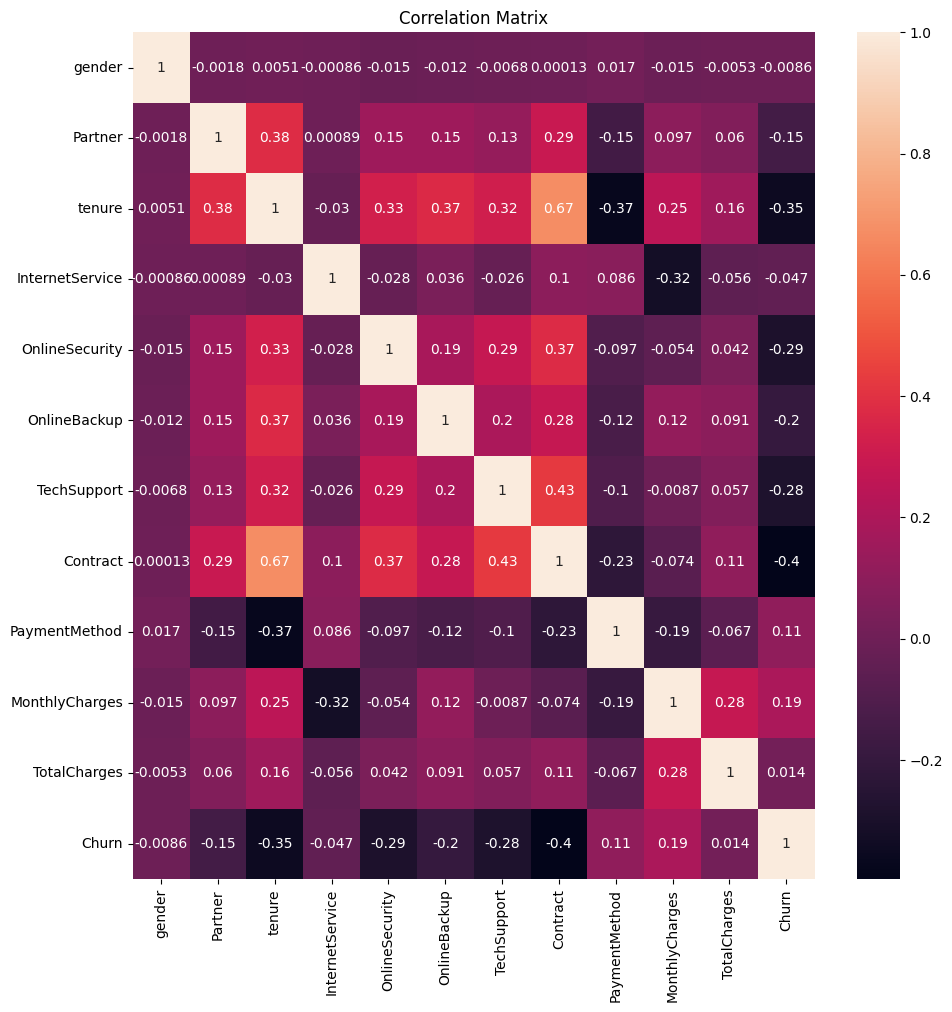

In [56]:
plt.figure(figsize=(11,11))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

<ipython-input-87-cdbf68c8eb3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['MonthlyCharges'],palette='Set1')
<ipython-input-87-cdbf68c8eb3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['tenure'],palette='Set2')
<ipython-input-87-cdbf68c8eb3f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['TotalCharges'],palette='Set3')


<Axes: ylabel='Contract'>

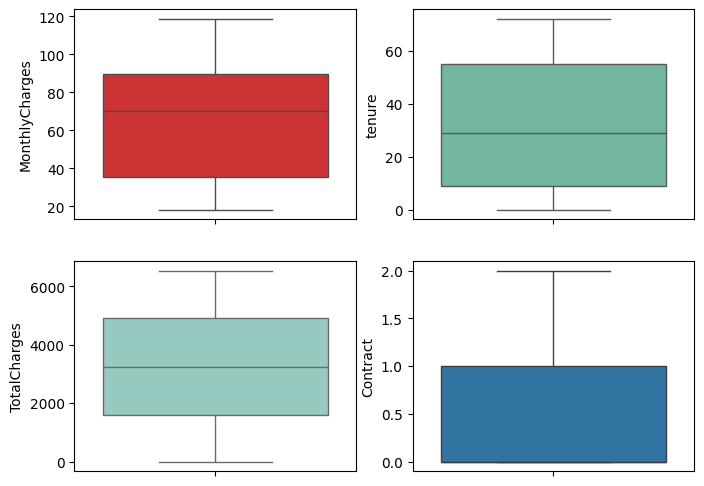

In [87]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.boxplot(df['MonthlyCharges'],palette='Set1')
plt.subplot(2,2,2)
sns.boxplot(df['tenure'],palette='Set2')
plt.subplot(2,2,3)
sns.boxplot(df['TotalCharges'],palette='Set3')
plt.subplot(2,2,4)
sns.boxplot(df['Contract'],)

In [35]:
for column in df.select_dtypes(include=['object']).columns:

    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column])

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

target_variable = 'Churn'

X = df.drop(columns=[target_variable])
y = df[target_variable]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
feature_importances = model.feature_importances_
print(feature_importances)

[0.02894957 0.02159513 0.02341711 0.01999603 0.17863605 0.00504185
 0.02303964 0.0263761  0.04074258 0.02671705 0.02222513 0.04039513
 0.01688315 0.01719393 0.09828808 0.05187736 0.18073042 0.17789568]


In [43]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
16    MonthlyCharges    0.180730
4             tenure    0.178636
17      TotalCharges    0.177896
14          Contract    0.098288
15     PaymentMethod    0.051877
8     OnlineSecurity    0.040743
11       TechSupport    0.040395
0             gender    0.028950
9       OnlineBackup    0.026717
7    InternetService    0.026376
2            Partner    0.023417
6      MultipleLines    0.023040
10  DeviceProtection    0.022225
1      SeniorCitizen    0.021595
3         Dependents    0.019996
13   StreamingMovies    0.017194
12       StreamingTV    0.016883
5       PhoneService    0.005042


In [48]:
df.drop(['MultipleLines'], axis = 1, inplace = True)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modell = LogisticRegression()

In [95]:
selected_features = x_test.columns
x_train = x_train[selected_features]

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
modell.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred = modell.predict(x_test)

In [107]:
a = accuracy_score(y_test,y_pred)
print('Accuracy is ---- > ',a*100,'%')

Accuracy is ---- >  80.85106382978722 %


In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       511
           1       0.68      0.57      0.62       194

    accuracy                           0.81       705
   macro avg       0.76      0.74      0.75       705
weighted avg       0.80      0.81      0.80       705



In [110]:
from xgboost import XGBClassifier
# just for comparision
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(x_train, y_train)
print("XGBoost Accuracy:", xgb.score(x_test, y_test))


XGBoost Accuracy: 0.774468085106383
